<a href="https://colab.research.google.com/github/robb2828/fournier-coding/blob/main/job-applications/shopify/Fall_2021_Intern_Data_Science_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fall 2021 Intern Data Science Challenge

Prepared by: Robb Fournier

For: Shopify

## Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 



1.   Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2.   What metric would you report for this dataset?
3.   What is its value?


**Answer:**


In [2]:
# We'll start by importing our pandas library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data hosted in GitHub, downloaded from this link: https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0
df_sneakers = pd.read_csv("https://raw.githubusercontent.com/robb2828/fournier-coding/main/job-applications/shopify/2019%20Winter%20Data%20Science%20Intern%20Challenge%20Data%20Set%20-%20Sheet1.csv")
df_sneakers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
# We'll take a look at the details of the features of the dataset
df_sneakers.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


It's clear that the issue is outliers affecting the average sales, there is a very high standard deviation and maximum order amount. The standard deviation is many times greater than the mean.

Given our domain knowledge -- specifically that most orders do not contain a large number of items -- we can safely assume these bulk orders are skewing the data. 

A potential remedy is outlier treatment. In this case, we could remove data points in the 95% percentiles of the distribution -- that is 2 standard deviations away from the mean.

In [13]:
ORDER_AMT_THRESHOLD = df_sneakers['order_amount'].mean() + (
    df_sneakers['order_amount'].std() * 2
)

df_sneakers_outlier_treatment = df_sneakers[df_sneakers['order_amount'] < ORDER_AMT_THRESHOLD]

print(f"Outlier treatment removed {len(df_sneakers) - len(df_sneakers_outlier_treatment)} records")

df_sneakers_outlier_treatment.describe()

Outlier treatment removed 19 records


,order_id,shop_id,user_id,order_amount,total_items
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,2501.425216,50.095162,849.915880,702.748444,1.992773
std,1443.152284,29.052172,86.816531,4627.726634,0.981326
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1251.000000,24.000000,776.000000,163.000000,1.000000
50%,2503.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,75.000000,925.000000,390.000000,3.000000
max,5000.000000,100.000000,999.000000,77175.000000,8.000000


The result is still skewed from expectations, although certainly better than the prior results. The average is now $702.75 over the 30 days. But, once again, our average is significantly less than our standard deviation. Clearly this dataset has several large records that make up more than 5% of the total dataset.

The approach can instead to be to focus on a new metric that better captures the middle of a skewed dataset: the median. 

In [16]:
print(df_sneakers.median())

order_id        2500.5
shop_id           50.0
user_id          849.0
order_amount     284.0
total_items        2.0
dtype: float64


The median values for the dataset provide a much better idea of where most orders lie. This can be visualized below.

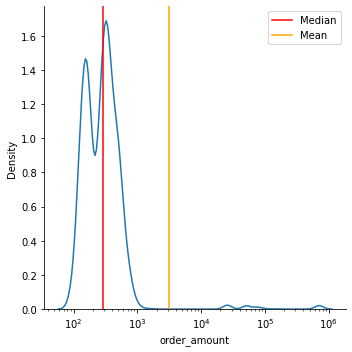

In [52]:
sns.displot(data=df_sneakers, x='order_amount', log_scale=True, kind='kde')
plt.axvline(x=df_sneakers['order_amount'].median(), c='red', label='Median')
plt.axvline(x=df_sneakers['order_amount'].mean(), c='orange', label='Mean')
plt.legend()
plt.show()

Based on this analysis, I would recommend using the average order median as the metric for best capturing the sales of the month. **The average order median for March 2017 was $284.**

## Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.



1.   How many orders were shipped by Speedy Express in total?
2.   What is the last name of the employee with the most orders?
3.   What product was ordered the most by customers in Germany?






**How many orders were shipped by Speedy Express in total?**

```
SELECT count(distinct(OrderID)) FROM [OrderDetails]
```
```
196
```


**What is the last name of the employee with the most orders?**

```
SELECT count(OrderID), LastName FROM Orders JOIN Employees ON Orders.EmployeeID=Employees.EmployeeID GROUP BY LastName ORDER BY count(OrderID) DESC LIMIT 1
```
```
40	Peacock
```

**What product was ordered the most by customers in Germany?**

```
SELECT count(Orders.OrderID), ProductID FROM [Customers] JOIN [Orders] ON Customers.CustomerID=Orders.CustomerID JOIN [OrderDetails] ON Orders.OrderID=OrderDetails.OrderID WHERE Country = "Germany" GROUP BY ProductID ORDER BY count(Orders.OrderID) DESC LIMIT 1
```
```
5	31
```